In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
import pickle
import seaborn as sns; 
sns.set(style ='white', color_codes = True)

In [2]:
data = pd.read_csv('C:\\Users\\aibar\\Desktop\\mlat1\\train.csv')
data.columns = map(str.lower, data.columns)

C:\Users\aibar\AppData\Local\Temp\ipykernel_13004\2856876887.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:\\Users\\aibar\\Desktop\\mlat1\\train.csv')


In [3]:
data.corrwith(data['drafted']).sort_values(ascending = False)

C:\Users\aibar\AppData\Local\Temp\ipykernel_13004\2109993695.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corrwith(data['drafted']).sort_values(ascending = False)


drafted                1.000000
porpag                 0.255466
dunksmade              0.242278
dunksmiss_dunksmade    0.239062
dporpag                0.224393
twopm                  0.223080
ftm                    0.214437
fta                    0.209107
twopa                  0.207722
midmade                0.206861
midmade_midmiss        0.203508
rimmade                0.197970
pts                    0.194695
rec_rank               0.190423
stops                  0.188164
dreb                   0.177491
rimmade_rimmiss        0.176158
treb                   0.169353
blk                    0.148024
mp                     0.132307
min_per                0.130029
stl                    0.126405
oreb                   0.125986
bpm                    0.125230
ast                    0.122953
gbpm                   0.119074
obpm                   0.118995
tpm                    0.117434
ogbpm                  0.115614
adjoe                  0.112482
tpa                    0.110365
usg     

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset 
data = pd.read_csv('C:\\Users\\aibar\\Desktop\\mlat1\\train.csv')
data.columns = map(str.lower, data.columns)
# Selecting features with the highest correlations to the target variable
data = data[["porpag",                 
"dunksmade",              
"dunksmiss_dunksmade",    
"dporpag",                
"twopm",                  
"ftm",                    
"fta",                    
"twopa",                  
"midmade",                
"midmade_midmiss",
"drafted"]]

# Handle missing values (for simplicity, filling NaNs with 0)
data.fillna(0, inplace=True)

# Splitting features and target variable
X = data.drop(['drafted'], axis=1)
y = data['drafted']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




C:\Users\aibar\AppData\Local\Temp\ipykernel_13004\137104373.py:8: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:\\Users\\aibar\\Desktop\\mlat1\\train.csv')


In [5]:
# Balancing the dataset using oversampling (SMOTE)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Choose a classification algorithm (Random Forest)
clf = RandomForestClassifier(random_state=42)

# Train the model on the balanced dataset
clf.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     11120
         1.0       0.28      0.71      0.40        99

    accuracy                           0.98     11219
   macro avg       0.64      0.85      0.70     11219
weighted avg       0.99      0.98      0.99     11219



AUROC Score: 0.8456


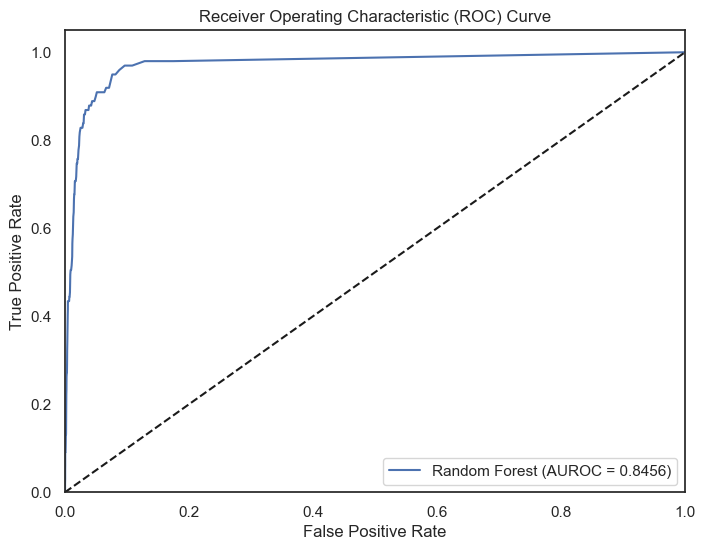

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve


# Calculate AUROC score
auroc_score = roc_auc_score(y_test, y_pred)
print(f"AUROC Score: {auroc_score:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test_scaled)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUROC = {auroc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [17]:


# Load and preprocess your test dataset
test_data = pd.read_csv('C:\\Users\\aibar\\Desktop\\mlat1\\test.csv') 
test_data.columns = map(str.lower, test_data.columns)




In [19]:
test_data = test_data[["player_id",
"porpag",                 
"dunksmade",              
"dunksmiss_dunksmade",    
"dporpag",                
"twopm",                  
"ftm",                    
"fta",                    
"twopa",                  
"midmade",                
"midmade_midmiss"]]
test_data.fillna(0, inplace=True)


C:\Users\aibar\AppData\Local\Temp\ipykernel_4056\2130373163.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.fillna(0, inplace=True)


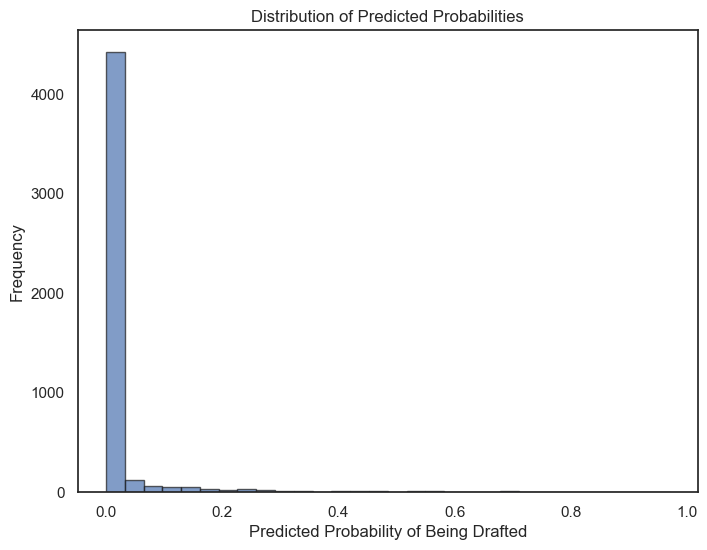

In [20]:
# Assuming you've already trained and have the 'clf' model from the previous code

# Splitting features for test data
X_test_data = test_data.drop(['player_id'], axis=1)  # Remove any identifier column that's not a feature

# Standardize the test features using the same scaler
X_test_data_scaled = scaler.transform(X_test_data)

# Make predictions on the test data
y_pred_prob_test = clf.predict_proba(X_test_data_scaled)[:, 1]  # Predicted probabilities for class 1 (drafted)

# Visualize predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob_test, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Predicted Probability of Being Drafted')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()


In [21]:
# Create a DataFrame with player_id and predicted probabilities
result_df = pd.DataFrame({
    'player_id': test_data['player_id'],
    'drafted': y_pred_prob_test
})

# Display the resulting DataFrame
print(result_df)

                                 player_id  probability_of_being_drafted
0     cf302b4d-84f7-4124-a25d-a75eed31978b                          0.00
1     f91837cd-4f49-4b70-963d-aeb82c6ce3da                          0.00
2     53ec2a29-1e7d-4c6d-86d7-d60d02af8916                          0.01
3     32402798-471c-4a54-8cb4-29cd95199014                          0.00
4     73b960f9-27b8-4431-9d23-a760e9bbc360                          0.02
...                                    ...                           ...
4965  a25ee55f-02a3-4f8e-8194-a5f427e14e7c                          0.00
4966  d0d9f45e-7b01-44b3-8d40-514ec338611d                          0.00
4967  f8df22c4-1602-4fab-896d-8820951aae2f                          0.00
4968  b791c69a-f769-4163-afda-051a6fd20a9d                          0.00
4969  18b51f5d-4746-4121-88fd-c8d0a1399130                          0.00

[4970 rows x 2 columns]


In [ ]:
compression_opts=dict(method='zip', archive_name='out.csv')
result_df.to_csv('out.zip', index=False, compression=compression_opts)